<a href="https://colab.research.google.com/github/Abhishakth007/Deep_Learning/blob/main/Hand_Written_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from tensorflow import keras

import cv2

import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

import seaborn as sn

import tensorflow as tf

from sklearn.model_selection import train_test_split

from google.colab import drive

import pickle as pkl

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

In [23]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = keras.datasets.mnist.load_data()

(X_train , y_train) , (X_test , y_test) = data

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
len(X_train)

60000

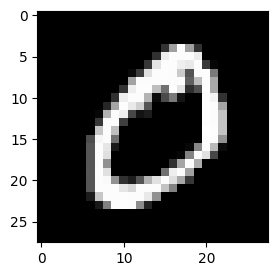

In [8]:
plt.figure(figsize = (10,3))
plt.imshow(X_train[1] , cmap = 'gray')
plt.show()

In [9]:
len(X_test)

10000

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

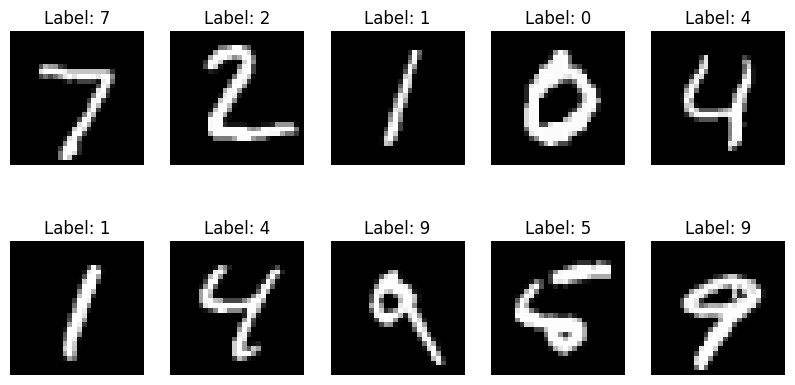

In [39]:
def plot_samples(images, labels, preds=None):
    plt.figure(figsize=(10,5))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}" if preds is None else f"Pred: {preds[i]}")
        plt.axis('off')
    plt.show()

plot_samples(X_test[:10], y_test[:10])


In [14]:
model = keras.models.Sequential([keras.layers.Conv2D(32 , (5,5) ,activation = 'relu' , input_shape = (28 , 28 , 1)),
                                    keras.layers.Conv2D(128 ,(3,3), activation = 'relu'),
                                    keras.layers.Flatten(),
                                    keras.layers.Dense(128 , activation = 'relu'),
                                    keras.layers.Dense(10 , activation = 'softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer = 'adam',
              loss= 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

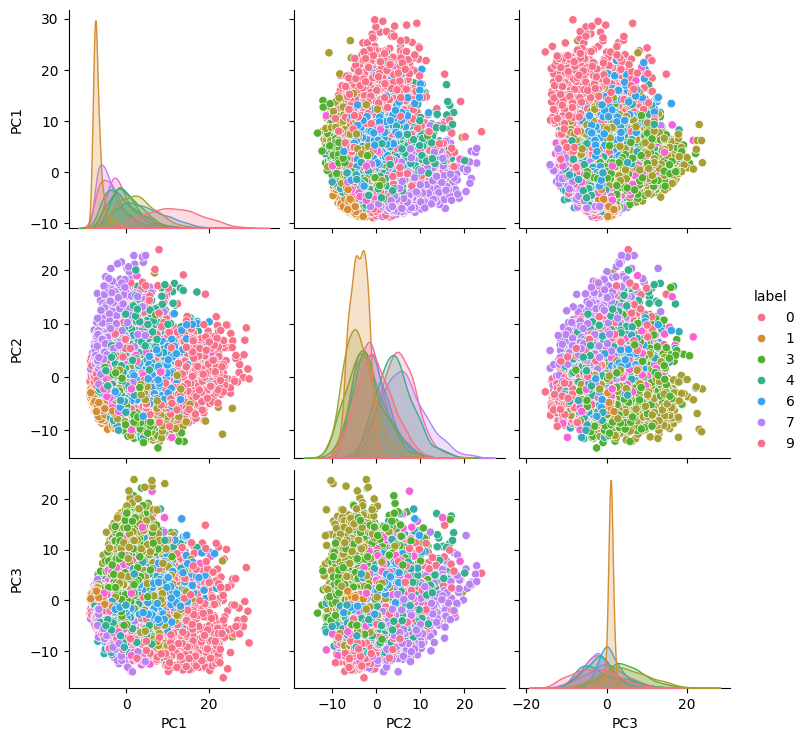

In [43]:
X_flat = X_test.reshape(X_test.shape[0], -1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flat)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df['label'] = y_test

sns.pairplot(df, hue='label', diag_kind='kde', palette="husl")
plt.show()

In [33]:
model.fit(X_train , y_train,epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 354s 189ms/step - accuracy: 0.9895 - loss: 0.0332
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 351s 187ms/step - accuracy: 0.9940 - loss: 0.0189
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 378s 185ms/step - accuracy: 0.9964 - loss: 0.0104
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 379s 184ms/step - accuracy: 0.9977 - loss: 0.0083
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 380s 183ms/step - accuracy: 0.9981 - loss: 0.0064
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 342s 183ms/step - accuracy: 0.9985 - loss: 0.0055
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 384s 184ms/step - accuracy: 0.9972 - loss: 0.0085
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 341s 182ms/step - accuracy: 0.9989 - loss: 0.0036
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 400s 191ms/step - accuracy: 0.9986 - loss: 0.0048
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 353s 188ms/step - accuracy: 0.9991 - loss: 0.0028


In [34]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9857 - loss: 0.0779


[0.05695012956857681, 0.9891999959945679]

In [35]:
def input_processing(file_path,prediction_model):

    image= cv2.imread(file_path)

    resized_img = cv2.resize(image , (28 , 28))

    gray_img = cv2.cvtColor(resized_img , cv2.COLOR_BGR2GRAY)

    plt.figure(figsize = (7,3))

    plt.imshow(gray_img,cmap = 'grey')

    plt.show()

    final_img = gray_img/255

    final_img = np.expand_dims(final_img, axis=0)

    final_img = np.expand_dims(final_img, axis=-1)

    y_predicted = prediction_model.predict(final_img)

    digit_classified = np.argmax(y_predicted)

    return f"The Number In The Image : {digit_classified}"





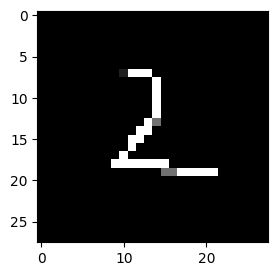

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


'The Number In The Image : 2'

In [26]:
path = "/content/drive/My Drive/Digit_Classification_Project/Image_2.png"

input_processing(path,model)

In [36]:
with open ('/content/drive/My Drive/Digit_Classification_Project/model.pkl' , 'wb') as file:

  pkl.dump(model, file)

In [37]:
with open('/content/drive/My Drive/Digit_Classification_Project/model.pkl', 'rb') as prediction_file:

  dp_model = pkl.load(prediction_file)

313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step


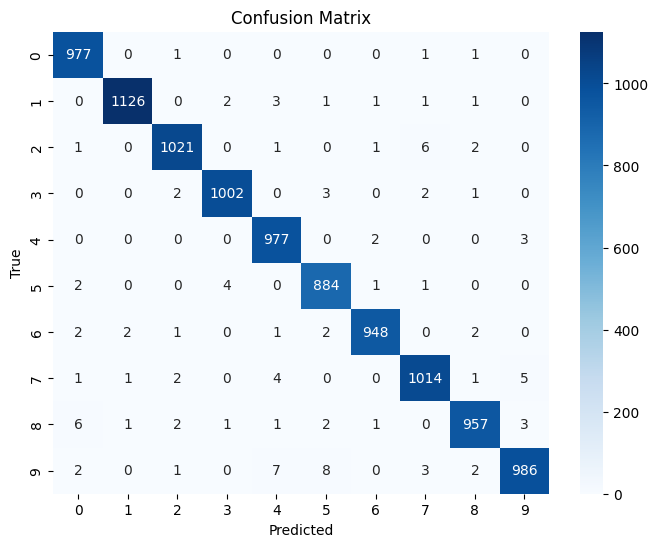

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test[..., np.newaxis])
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


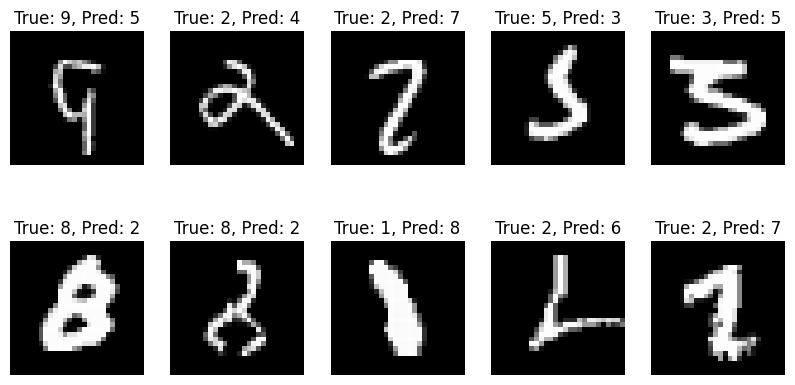

In [41]:
misclassified_idxs = np.where(y_pred_classes != y_test)[0]

plt.figure(figsize=(10,5))
for i, idx in enumerate(misclassified_idxs[:10]):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.show()
